In [1]:
# pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
%matplotlib inline

Ноутбук посвящен работе с геоданными с помощью библиотек shapely и geopandas. 

### Знакомство с shapely

`Shapely` - библиотека для работы с геометрическими объектами

`Geopandas` - pandas, только с гео

`folium` - для визуализации

In [3]:
from shapely.geometry import Point, LineString, Polygon

#### точка

In [4]:
moscow_lon = 37.618423
moscow_lat = 55.751244
point = Point(moscow_lon, moscow_lat)

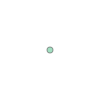

In [5]:
point

In [6]:
print("area ", point.area)
print("length ", point.length)

area  0.0
length  0.0


In [7]:
point.bounds

(37.618423, 55.751244, 37.618423, 55.751244)

#### Линия

In [8]:
moscow_lon = 37.618423
moscow_lat = 55.751244

piter_lon = 30.26417
piter_lat = 59.89444

line = LineString([(moscow_lon, moscow_lat), (piter_lon, piter_lat)])

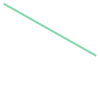

In [9]:
line

bounds - (minx, miny, maxx, maxy) 

In [10]:
line.bounds

(30.26417, 55.751244, 37.618423, 59.89444)

In [11]:
list(line.coords)

[(37.618423, 55.751244), (30.26417, 59.89444)]

#### Полигон

https://boundingbox.klokantech.com/ - сайт для создания bounding box города

In [12]:
polygon = Polygon([(37.3193289,55.489927), 
                   (37.9456611,55.489927),
                   (37.9456611,56.009657),
                   (37.3193289,56.009657)])
print(polygon.area)
print(polygon.length)

0.32552363430599734
2.2921243999999916


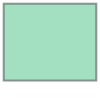

In [13]:
polygon

Границы полигона

In [14]:
polygon.bounds

(37.3193289, 55.489927, 37.9456611, 56.009657)

Для полигона, у которого внутри дырка, можно найти внутренние и внешние границы

In [15]:
list(polygon.exterior.coords)

[(37.3193289, 55.489927),
 (37.9456611, 55.489927),
 (37.9456611, 56.009657),
 (37.3193289, 56.009657),
 (37.3193289, 55.489927)]

In [16]:
list(polygon.interiors)

[]

### Операции с геометрией

<img src=http://docs.qgis.org/testing/en/_images/overlay_operations.png>

intersection

In [17]:
a = Point(0, 0).buffer(1.1)
b = Point(1, 1).buffer(0.7)

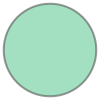

In [18]:
b

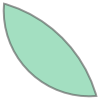

In [19]:
a.intersection(b)

union

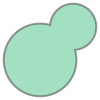

In [20]:
a.union(b)

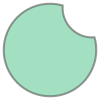

In [21]:
a.difference(b)

contains

In [22]:
polygon.contains(Point(moscow_lon, moscow_lat))

True

In [23]:
polygon.contains(Point(piter_lon, piter_lat))

False

### Geopandas

In [24]:
geo_series = gpd.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
geo_series

0    POINT (-120.00000 45.00000)
1    POINT (-121.20000 46.00000)
2    POINT (-122.90000 47.50000)
dtype: geometry

In [25]:
geo_series.crs = {'init': 'epsg:4326'}

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


#### GeoDataFrame

In [26]:
moscow_districts = gpd.read_file('moscow_districts.geojson')

In [27]:
moscow_districts.columns = moscow_districts.columns.str.lower()

In [28]:
moscow_districts.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,women18_55,womenolder,working_ag,geometry
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,14569.0,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
1,ЗелАО,2277.0,11418.0,4116.0,Матушкино,15058.0,19196.0,44258.0,25062.0,6834.0,10948.0,10942.0,22366.0,"POLYGON ((37.17853 56.00795, 37.18083 56.00825..."
2,ЗАО,1054.0,5767.0,1614.0,Внуково,6399.0,9174.0,21378.0,12204.0,3436.0,5775.0,4785.0,11542.0,"MULTIPOLYGON (((37.18317 55.60565, 37.18455 55..."
3,ЗелАО,1628.0,8830.0,3540.0,Савёлки,12807.0,15214.0,35510.0,20296.0,5494.0,8379.0,9267.0,17209.0,"POLYGON ((37.20946 56.00083, 37.20975 56.00088..."
4,ЗелАО,1822.0,11186.0,4712.0,Силино,15518.0,19343.0,43495.0,24152.0,6587.0,10204.0,10806.0,21390.0,"POLYGON ((37.13160 56.01645, 37.13266 56.01678..."


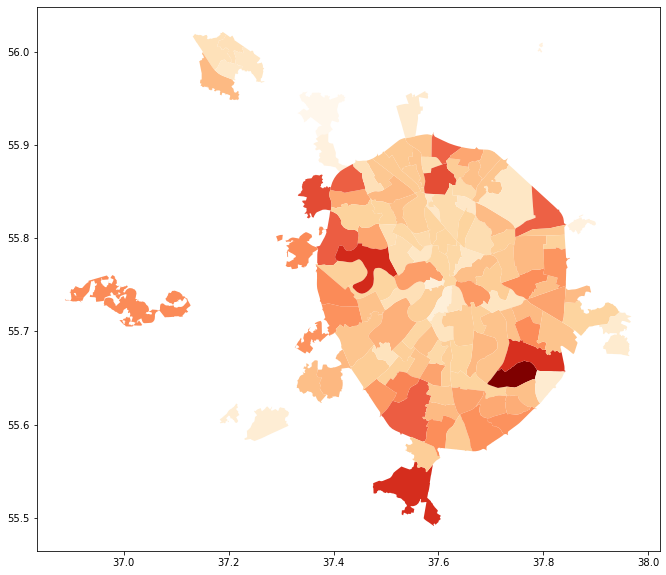

In [29]:
moscow_districts.plot('totalpopul', figsize=(12,10), cmap='OrRd');

#### OpenStreetMap

Скачаем данные по местам из OpenStreetMap на примере Москвы

https://wiki.openstreetmap.org/wiki/Main_Page

`node` - точка, параметры широта и долгота

`way` - линейные объекты, например улица, дорога

`relation` - отношение, для связи между объектами

In [30]:
import requests

https://wiki.openstreetmap.org/wiki/Map_Features - информация по категориям

In [31]:
overpass_url = "https://overpass.kumi.systems/api/interpreter"

overpass_query = """
[out:json];
(
 node["shop"](55.4245,37.0919,56.0671,38.1335);
);
out body;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [50]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.57 93a4d346',
 'osm3s': {'timestamp_osm_base': '2021-11-22T18:18:39Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 1000,
   'lat': 55.9951147,
   'lon': 37.2075319,
   'tags': {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, до 22:45 c 2014-05-23',
    'name': 'Десяточка',
    'opening_hours': '08:30-22:45',
    'shop': 'supermarket'}},
  {'type': 'node',
   'id': 245868628,
   'lat': 55.9131682,
   'lon': 37.3961899,
   'tags': {'addr:city': 'Химки',
    'addr:housenumber': 'к4',
    'addr:postcode': '141400',
    'addr:street': 'микрорайон ИКЕА',
    'brand': 'Ашан',
    'brand:en': 'Auchan',
    'brand:ru': 'Ашан',
    'brand:wikidata': 'Q758603',
    'brand:wikipedia': 'ru:Auchan',
    'contact:facebook': 'https://www.facebook.com/AuchanRussia',
    'contact:instagram': 'https://www.instagram.com/auchan.ru/',
    'cont

In [33]:
def get_tag(x, key_name):
    if str(key_name) in x:
        tmp = x[key_name]
        return tmp
    else:
        return "unknown"

In [34]:
loaded = pd.DataFrame(data['elements'])
loaded['shop'] = loaded['tags'].apply(lambda x: get_tag(x, 'shop'))

In [35]:
loaded.head()

,type,id,lat,lon,tags,shop
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket
2,node,245868630,55.910621,37.399770,"{'addr:city': 'Химки', 'addr:housenumber': 'с1...",furniture
3,node,245869056,55.912037,37.392914,"{'addr:city': 'Химки', 'addr:housenumber': 'к3...",doityourself
4,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes


#### Создание geodataframe

In [52]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(loaded.lon, loaded.lat)]
places_geo = gpd.GeoDataFrame(loaded, crs=crs, geometry=geometry)

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [37]:
places_geo.head()

,type,id,lat,lon,tags,shop,geometry
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket,POINT (37.20753 55.99511)
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket,POINT (37.39619 55.91317)
2,node,245868630,55.910621,37.399770,"{'addr:city': 'Химки', 'addr:housenumber': 'с1...",furniture,POINT (37.39977 55.91062)
3,node,245869056,55.912037,37.392914,"{'addr:city': 'Химки', 'addr:housenumber': 'к3...",doityourself,POINT (37.39291 55.91204)
4,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes,POINT (38.06889 55.65605)


### Spatial join

проверка проекций - у двух датафреймов они должны совпадать

In [38]:
moscow_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
places_geo.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/t8/rf5y38yd2pg3fw8v0rwbkqd80000gp/T/ipykernel_36706/2870518855.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')


In [41]:
places_district.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,...,womenolder,working_ag,geometry,index_right,type,id,lat,lon,tags,shop
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",38873,node,7079283310,55.745845,37.513373,{'shop': 'dairy'},dairy
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",38874,node,7079283311,55.745893,37.513449,{'shop': 'greengrocer'},greengrocer
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",38875,node,7079283312,55.745929,37.513417,{'contact:website': 'http://www.karavay-sv.ru/...,bakery
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",38876,node,7079283313,55.745970,37.513273,{'shop': 'alcohol'},alcohol
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",38847,node,7066537263,55.745970,37.513381,"{'brand': 'У Палыча', 'contact:email': 'com@pa...",convenience


In [42]:
places_district['shop_count'] = places_district.groupby('name')['id'].transform('nunique')

In [43]:
district_stats = places_district[['name','geometry', 'shop_count', 'totalpopul']].drop_duplicates('name')#

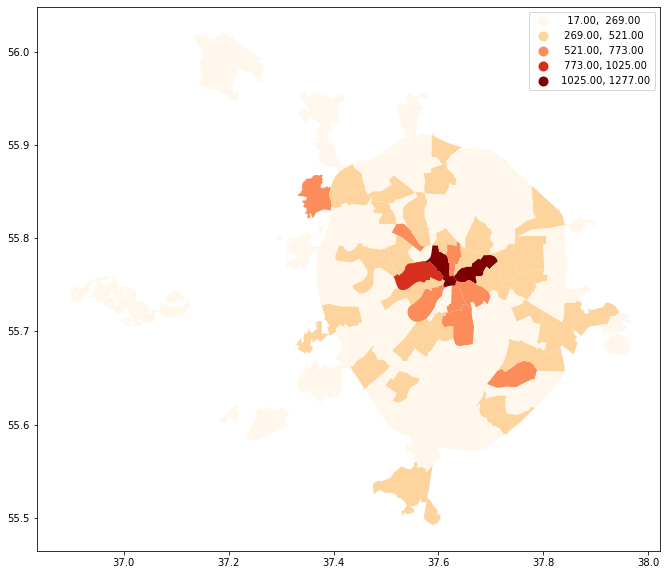

In [45]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equalinterval',legend=True);

Изменим проекцию на Pseudo-Mercator EPSG:3857

In [46]:
district_stats = district_stats.to_crs(epsg=3857)

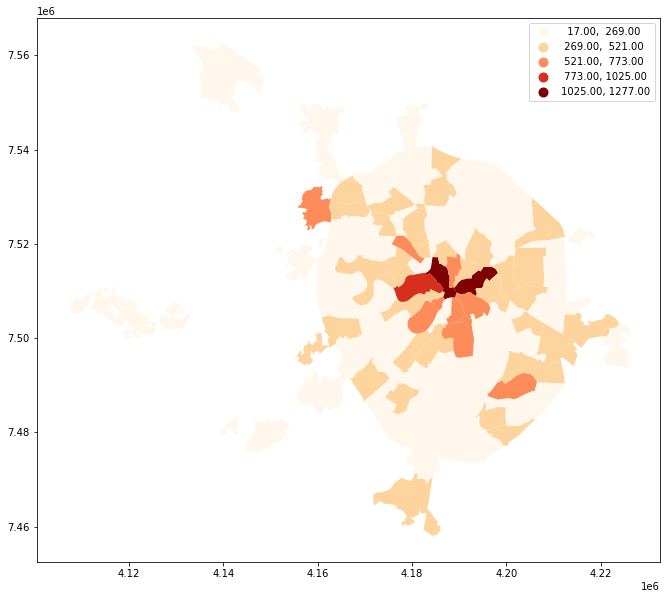

In [48]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equalinterval', legend=True);